# Analyzing Data

## Prison Helicopter Escapes

We begin by importing some helper functions.

In [45]:
from helper import *           

## Get the Data

Now, let's get the data from the [List of helicopter prison escapes](https://en.wikipedia.org/wiki/List_of_helicopter_prison_escapes) Wikipedia article.

In [46]:
url = 'https://en.wikipedia.org/wiki/List_of_helicopter_prison_escapes'
data = data_from_url(url)

Let's print the first three rows

In [47]:
for row in data[:3]:
    print(row)

['August 19, 1971', 'Santa Martha Acatitla', 'Mexico', 'Yes', 'Joel David Kaplan Carlos Antonio Contreras Castro', "Joel David Kaplan was a New York businessman who had been arrested for murder in 1962 in Mexico City and was incarcerated at the Santa Martha Acatitla prison in the Iztapalapa borough of Mexico City. Joel's sister, Judy Kaplan, arranged the means to help Kaplan escape, and on August 19, 1971, a helicopter landed in the prison yard. The guards mistakenly thought this was an official visit. In two minutes, Kaplan and his cellmate Carlos Antonio Contreras, a Venezuelan counterfeiter, were able to board the craft and were piloted away, before any shots were fired.[9] Both men were flown to Texas and then different planes flew Kaplan to California and Contreras to Guatemala.[3] The Mexican government never initiated extradition proceedings against Kaplan.[9] The escape is told in a book, The 10-Second Jailbreak: The Helicopter Escape of Joel David Kaplan.[4] It also inspired t

##  Removing the Details
We initialize an index variable with the value of 0. The purpose of this variable is to help us track which row we're modifying.

In [48]:
index = 0
for row in data:
    data[index] = row[:-1]
    index += 1

In [49]:
print(data[:3])

[['August 19, 1971', 'Santa Martha Acatitla', 'Mexico', 'Yes', 'Joel David Kaplan Carlos Antonio Contreras Castro'], ['October 31, 1973', 'Mountjoy Jail', 'Ireland', 'Yes', "JB O'Hagan Seamus TwomeyKevin Mallon"], ['May 24, 1978', 'United States Penitentiary, Marion', 'United States', 'No', 'Garrett Brock TrapnellMartin Joseph McNallyJames Kenneth Johnson']]


## Extracting the Year
In the code cell below, we iterate over data using the iterable variable row and: * With every occurrence of row[0], we refer to the first entry of row, i.e., the date. * Thus, with date = fetch_year(row[0]), we're extracting the year out of the date in row[0] and assiging it to the variable date. * We then replace the value of row[0] with the year that we just extracted.

In [50]:
for row in data:
    date = fetch_year(row[0])
    row[0] = date

In [51]:
print(data[:3])

[[1971, 'Santa Martha Acatitla', 'Mexico', 'Yes', 'Joel David Kaplan Carlos Antonio Contreras Castro'], [1973, 'Mountjoy Jail', 'Ireland', 'Yes', "JB O'Hagan Seamus TwomeyKevin Mallon"], [1978, 'United States Penitentiary, Marion', 'United States', 'No', 'Garrett Brock TrapnellMartin Joseph McNallyJames Kenneth Johnson']]


# Attempts per Year

In [52]:
min_year = min(data, key=lambda x: x[0])[0]
max_year = max(data, key=lambda x: x[0])[0]

Before we move on, let's check what are the earliest and latest dates we have in our dataset.

In [53]:
print(min_year)
print(max_year)

1971
2020


Now we'll create a list of all the years ranging from min_year to max_year. Our goal is to then determine how many prison break attempts there were for each year. Since years in which there weren't any prison breaks aren't present in the dataset, this will make sure we capture them.

In [54]:
years = []
for year in range(min_year, max_year + 1):
    years.append(year)

Let's take a look at years to see if it looks like we expected.

In [55]:
print(years)

[1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]


Now we create a list where each element looks like [<year>, 0].

In [56]:
attempts_per_year = []
for year in years:
    attempts_per_year.append([year, 0])

And finally we increment the second entry (the one on index 1 which starts out as being 0) by 1 each time a year appears in the data.

In [57]:
for row in data:
    for year_attempt in attempts_per_year:
        year = year_attempt[0]
        if row[0] == year:
            year_attempt[1] += 1
            
print(attempts_per_year)  

[[1971, 1], [1972, 0], [1973, 1], [1974, 0], [1975, 0], [1976, 0], [1977, 0], [1978, 1], [1979, 0], [1980, 0], [1981, 2], [1982, 0], [1983, 1], [1984, 0], [1985, 2], [1986, 3], [1987, 1], [1988, 1], [1989, 2], [1990, 1], [1991, 1], [1992, 2], [1993, 1], [1994, 0], [1995, 0], [1996, 1], [1997, 1], [1998, 0], [1999, 1], [2000, 2], [2001, 3], [2002, 2], [2003, 1], [2004, 0], [2005, 2], [2006, 1], [2007, 3], [2008, 0], [2009, 3], [2010, 1], [2011, 0], [2012, 1], [2013, 2], [2014, 1], [2015, 0], [2016, 1], [2017, 0], [2018, 1], [2019, 0], [2020, 1]]


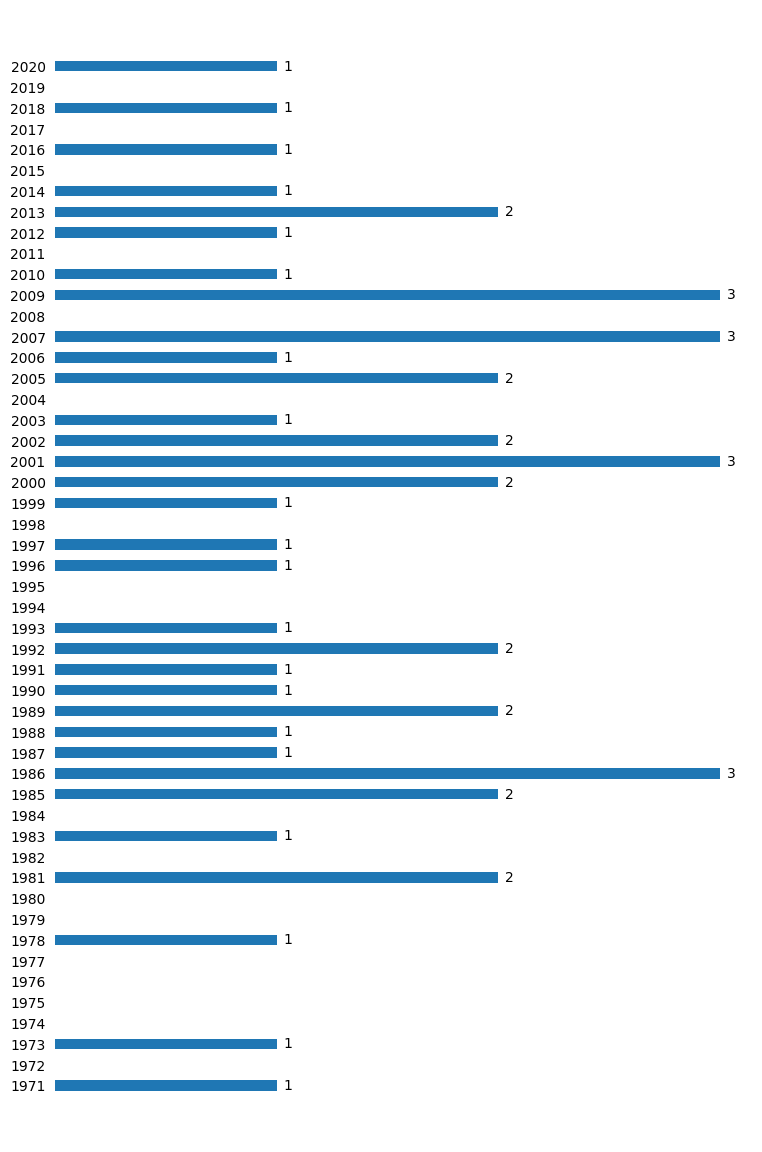

In [58]:
%matplotlib inline
barplot(attempts_per_year)

# Attempts per Year II

In [59]:
# Instruction 1 - for each row in data
for year_attempt in attempts_per_year: # Instruction 2 - nothing to do here
    # Instruction 3 - assign the year value in year_attempt to year
    if row[0] == year:
        year_attempt[1] += 1

# Instruction 4 - print the results

# Attempts per Year III

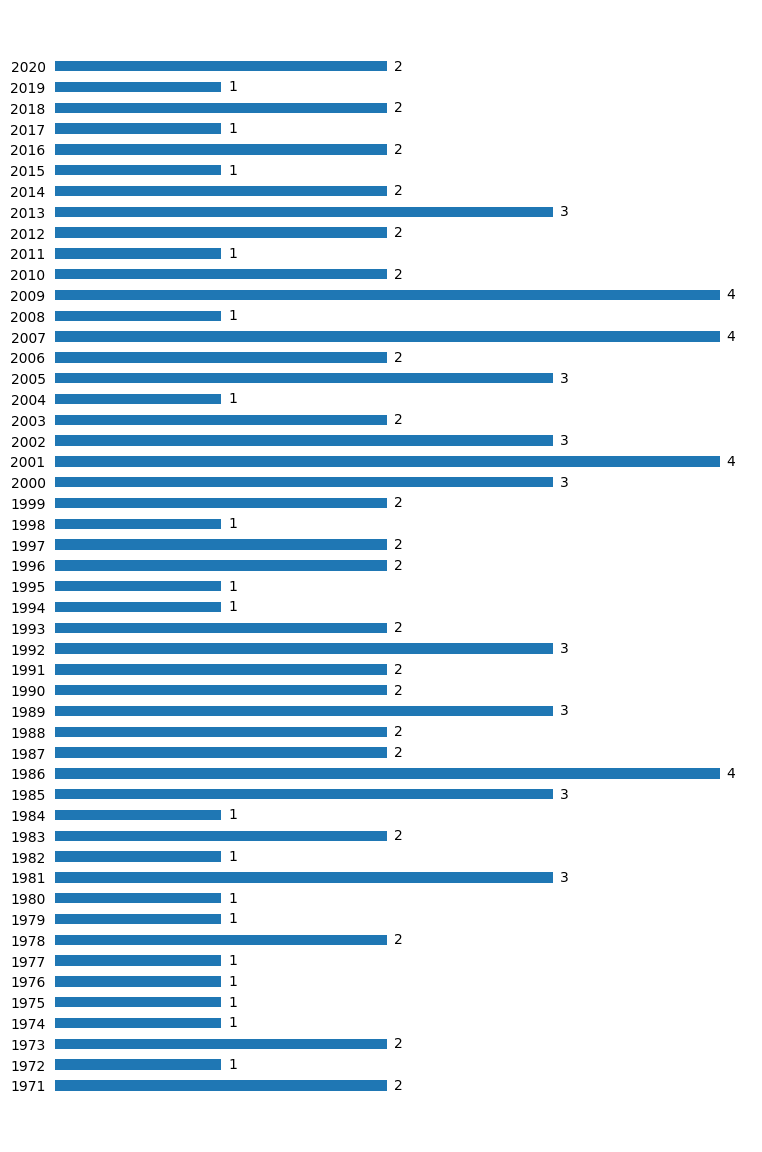

In [60]:
%matplotlib inline
barplot(attempts_per_year)

# Attempts by Country

In [62]:
countries_frequency = df["Country"].value_counts()
print_pretty_table(countries_frequency)

Country,Number of Occurrences
France,15
United States,8
Canada,4
Greece,4
Belgium,4
United Kingdom,2
Australia,2
Brazil,2
Chile,1
Mexico,1
